In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('Student_Performance.csv')

In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [11]:
df.shape

(10000, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [8]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [17]:
df[df.duplicated()] 

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [18]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(9873, 6)

In [21]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [24]:
import seaborn as sns
#sns.pairplot(df[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced']],kind='reg',height=5 )

In [26]:
df=pd.get_dummies(df,dtype=int)

In [27]:
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0
...,...,...,...,...,...,...,...
9995,1,49,4,2,23.0,0,1
9996,7,64,8,5,58.0,0,1
9997,6,83,8,5,74.0,0,1
9998,9,97,7,0,95.0,0,1


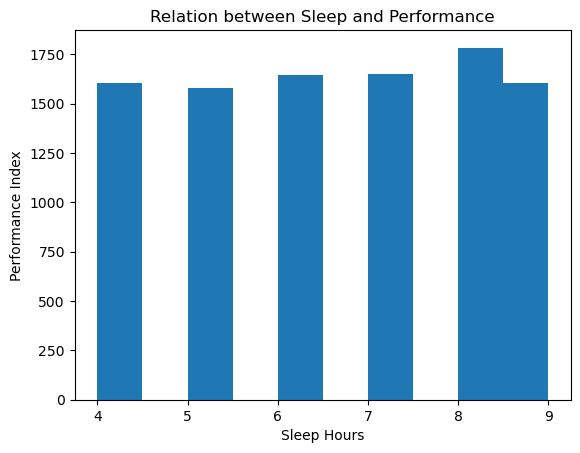

In [37]:
import pandas as pd

# Assuming you have a DataFrame called 'df'
# Replace spaces with underscores in column names
df.columns = [col.replace(' ', '_') for col in df.columns]

# Now you can use the updated column names in your plotting code
import matplotlib.pyplot as plt
plt.hist(df['Sleep_Hours'])
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.title('Relation between Sleep and Performance')
plt.show()

<Axes: xlabel='Sample_Question_Papers_Practiced', ylabel='Performance_Index'>

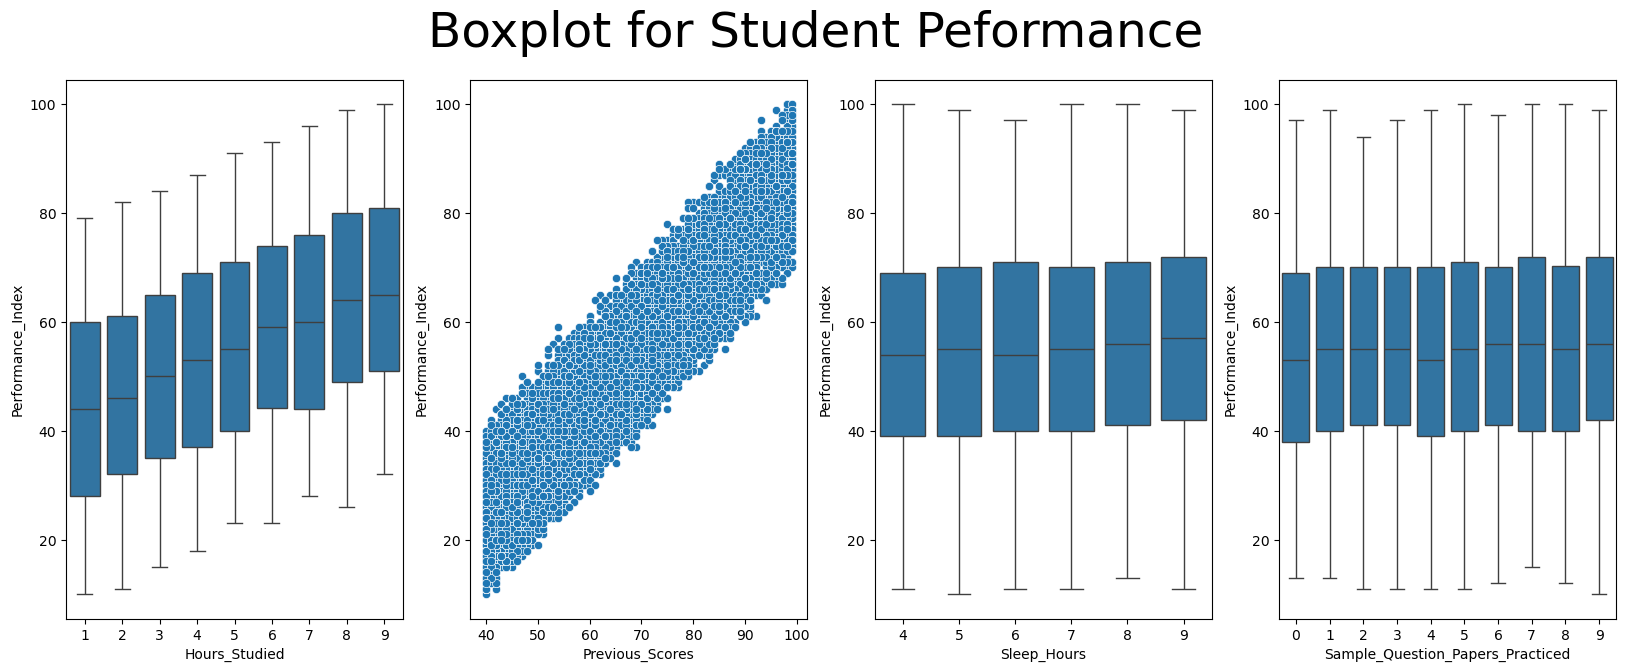

In [56]:
plt.rcParams['figure.figsize'] = [20, 7]

fig , (ax1,ax2,ax3,ax4)=plt.subplots(1,4)
fig.suptitle('Boxplot for Student Peformance',fontsize=35)

sns.boxplot(x='Hours_Studied',y='Performance_Index',data=df,ax=ax1)
sns.scatterplot(x='Previous_Scores',y='Performance_Index',data=df,ax=ax2)
sns.boxplot(x='Sleep_Hours',y='Performance_Index',data=df,ax=ax3)
sns.boxplot(x='Sample_Question_Papers_Practiced',y='Performance_Index',data=df,ax=ax4)


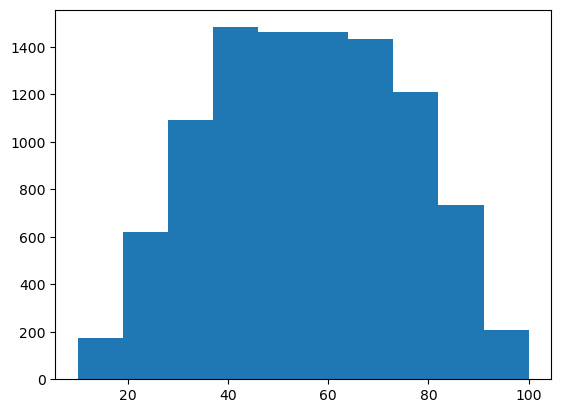

In [39]:
plt.hist(df['Performance_Index'])
plt.show()

In [42]:
corelation=df.corr()
corelation

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index,Extracurricular_Activities_No,Extracurricular_Activities_Yes
Hours_Studied,1.000000,-0.010676,0.002131,0.015740,0.375332,-0.004899,0.004899
Previous_Scores,-0.010676,1.000000,0.007975,0.008719,0.915135,-0.009534,0.009534
Sleep_Hours,0.002131,0.007975,1.000000,0.004907,0.050352,0.024008,-0.024008
Sample_Question_Papers_Practiced,0.015740,0.008719,0.004907,1.000000,0.043436,-0.013839,0.013839
Performance_Index,0.375332,0.915135,0.050352,0.043436,1.000000,-0.026075,0.026075
Extracurricular_Activities_No,-0.004899,-0.009534,0.024008,-0.013839,-0.026075,1.000000,-1.000000
Extracurricular_Activities_Yes,0.004899,0.009534,-0.024008,0.013839,0.026075,-1.000000,1.000000


<Axes: >

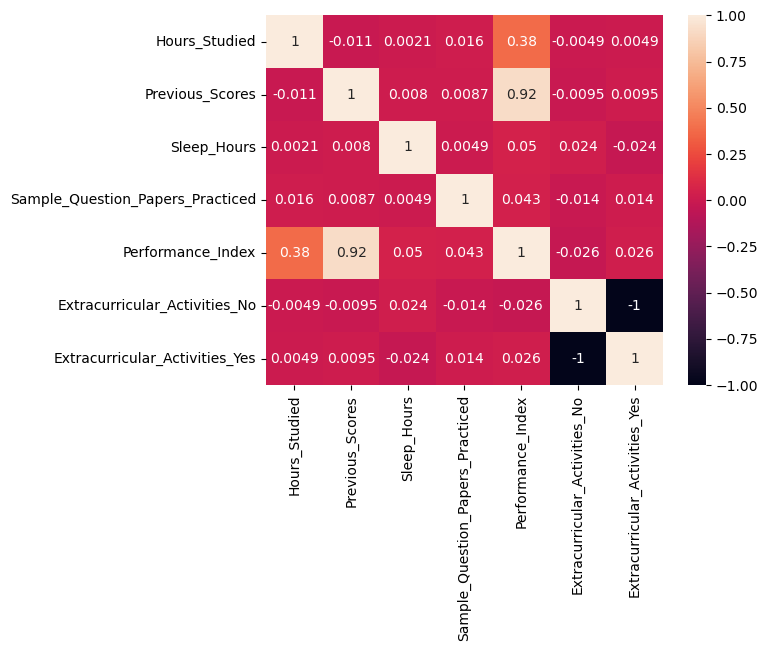

In [43]:
sns.heatmap(corelation, annot=True)

In [44]:
df.describe()

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index,Extracurricular_Activities_No,Extracurricular_Activities_Yes
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651,0.505014,0.494986
std,2.589081,17.325601,1.697683,2.867202,19.208570,0.500000,0.500000
min,1.000000,40.000000,4.000000,0.000000,10.000000,0.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000,0.000000,0.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000,1.000000,0.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000,1.000000,1.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000,1.000000,1.000000


In [47]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [48]:
# Splitting the dataset
X= df[['Hours_Studied','Previous_Scores','Sleep_Hours','Sample_Question_Papers_Practiced','Extracurricular_Activities_No','Extracurricular_Activities_Yes']]
y=df[['Performance_Index']]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
sc=StandardScaler()

In [51]:
X_train_scaled=sc.fit_transform(X_train)
X_test_Scaled=sc.transform(X_test)

LinearRegression()

In [59]:
cr=cross_validate(lr,X_train_scaled, y_train, cv=5)

In [65]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [66]:
y_pred=lr.predict(X_test_Scaled)

In [67]:
y_pred

array([[46.460841  ],
       [80.24101889],
       [61.0250203 ],
       ...,
       [36.7407445 ],
       [84.5071866 ],
       [65.55671079]])

In [71]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))

1.6405088468146398
0.9882856360312109
0.034859912294777314


In [ ]:
#model predicted 98% its a great model

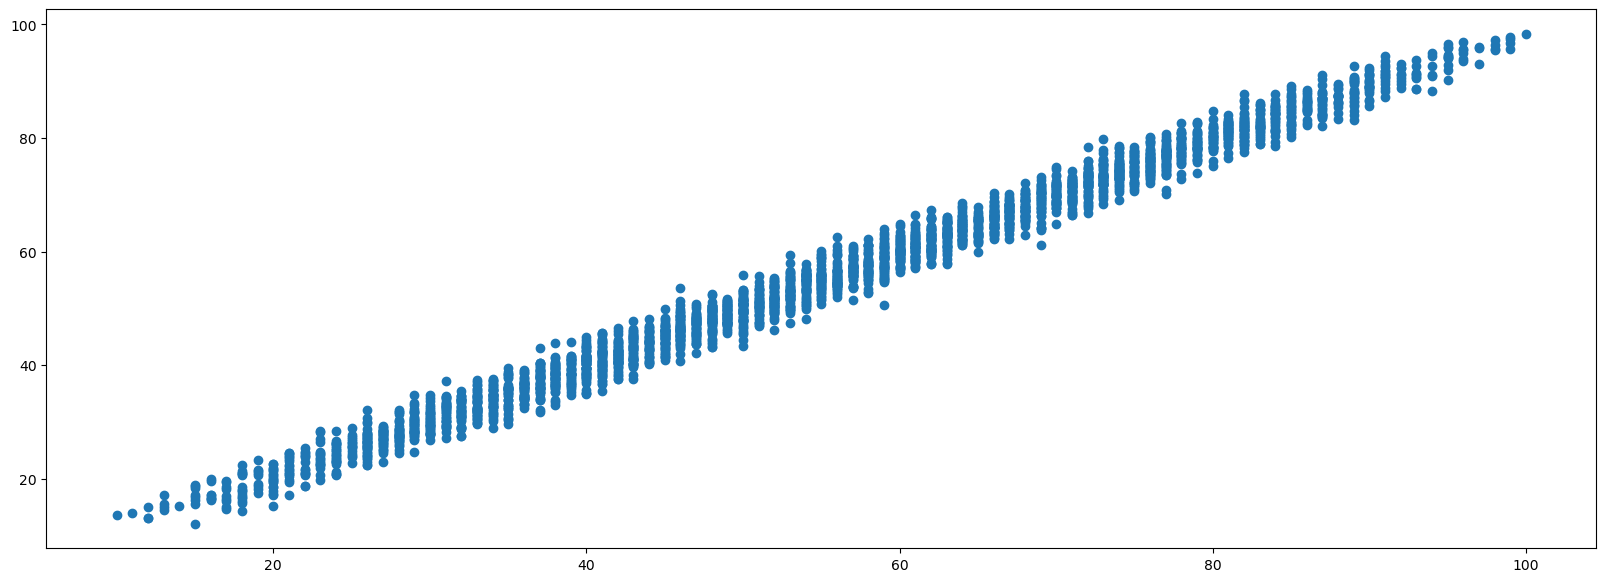

In [74]:
plt.scatter(y_test,y_pred)
